In [7]:
#import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #visualise image
%matplotlib inline
import cv2 #features extractions
import os 

In [14]:
#location of datasets
DATADIR = '...\\kaggle\\'

#categories of file in datasets
CATEGORIES = ['jute','maize','rice', 'sugarcane', 'wheat']
IMG_SIZE=100

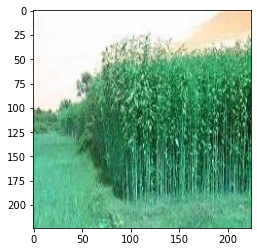

In [15]:
#sample of image in the datasets 
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [16]:
#preprocessing data
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img)) #read image
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) #resize image
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [17]:
#total of images/length of data
print(len(training_data))

804


In [18]:
#store length of data for further use
lenofimage = len(training_data)

In [19]:
#changing to 2D array because SVM only takes 2D input to train
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)
##X = tf.keras.utils.normalize(X, axis = 1)

In [20]:
#flatten array
X = X/255.0

In [21]:
#change y to array form
y=np.array(y)

In [22]:
#split data to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [23]:
#fitting our data in SVM model
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto', probability=True)
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear', probability=True)

In [24]:
#SVM parameters use
params = svc.get_params()
params_df = pd.DataFrame(params, index=[0])
params_df.T

,0
C,1.0
break_ties,False
cache_size,200
class_weight,None
coef0,0.0
decision_function_shape,ovr
degree,3
gamma,auto
kernel,linear
max_iter,-1


In [25]:
#predictiing x test
y2 = svc.predict(X_test)

In [26]:
#accuracy
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",{accuracy_score(y_test,y2)*100})


Accuracy on unknown data is {92.03980099502488}


In [27]:
#classification report
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,y2))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       0.92      0.97      0.95        36
           1       0.97      0.78      0.86        41
           2       0.95      0.95      0.95        41
           3       0.91      0.93      0.92        44
           4       0.86      0.97      0.92        39

    accuracy                           0.92       201
   macro avg       0.92      0.92      0.92       201
weighted avg       0.92      0.92      0.92       201



In [28]:
result = pd.DataFrame({'original' : y_test,'predicted' : y2})
result

,original,predicted
0,0,0
1,3,3
2,3,3
3,0,0
4,1,1
...,...,...
196,1,1
197,3,3
198,3,3
199,1,3
